In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings #  for avoid unwanted warnings
warnings.filterwarnings('ignore')
from IPython.core.display import display, HTML # for HTMl tag use in python

In [2]:
pd.set_option('display.max_columns',None) # to show maximum number of columns

In [3]:
data=pd.read_excel('Mall_Customers.csv.xlsx',index_col='CustomerID')

In [4]:
data.head()

,Genre,Age,Annual_Income_(k$),Spending_Score
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [5]:
data.shape

(200, 4)

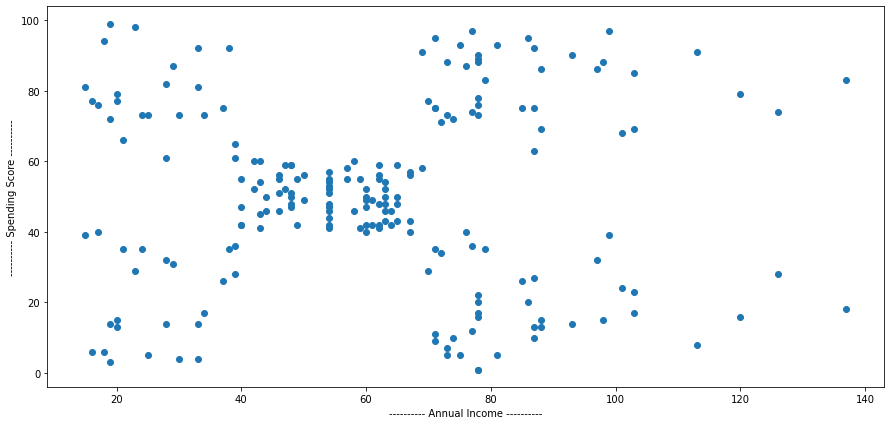

In [81]:
plt.figure(figsize=(15,7))
plt.scatter(data['Annual_Income_(k$)'],data['Spending_Score'])
plt.xlabel('---------- Annual Income ----------')
plt.ylabel('---------- Spending Score ----------')
plt.show()

In [7]:
from sklearn.cluster import KMeans

# this code we find how much cluster we need, thats called elbow method
wcss = []
for i in range(1,11):  # you can take 21 instead of 11 but, jurnally we take 11
    km = KMeans(n_clusters=i)
    km.fit_predict(data.iloc[:,[2,3]].values)
    wcss.append(km.inertia_)
    
wcss

[269981.28000000014,
 182440.30762987016,
 106348.37306211119,
 73679.78903948837,
 44448.45544793369,
 37265.86520484345,
 30273.394312070028,
 25012.917069885472,
 21932.392044240973,
 19649.59658286696]

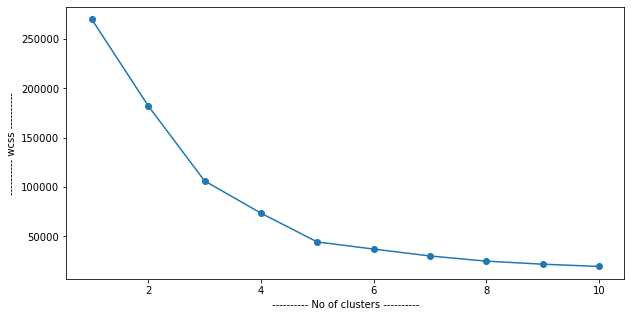

In [8]:
plt.figure(figsize=(10,5))
plt.plot(range(1,11),wcss,marker='o')
plt.xlabel('---------- No of clusters ----------')
plt.ylabel('---------- wcss ----------')
plt.show()
# you can clearly see 5th point have slope going change you we choose 5 its means we choose 5 clusters

In [9]:
x=data.iloc[:,[2,3]].values # data convert into array
km = KMeans(n_clusters=5) # we take 5 coz, above we verfiy that we should take 5 cluster
y_means = km.fit_predict(x)

In [10]:
y_means

array([1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 4,
       1, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 0, 2, 4, 2, 0, 2, 0, 2,
       4, 2, 0, 2, 0, 2, 0, 2, 0, 2, 4, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [20]:
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [12]:
cluster_1 = pd.DataFrame({'cluster_1_Annual_Income':x[y_means == 0,0],'cluster_1_Spending_Score':x[y_means == 0,1]})
cluster_1.sample(5)

,cluster_1_Annual_Income,cluster_1_Spending_Score
14,78,1
21,87,10
7,77,12
19,87,27
30,103,23


In [13]:
cluster_2 = pd.DataFrame({'cluster_2_Annual_Income':x[y_means == 1,0],'cluster_2_Spending_Score':x[y_means == 1,1]}) 
cluster_2.sample(5)

,cluster_2_Annual_Income,cluster_2_Spending_Score
5,19,14
12,28,14
14,29,31
11,25,5
22,39,28


In [14]:
cluster_3 = pd.DataFrame({'cluster_3_Annual_Income':x[y_means == 2,0],'cluster_3_Spending_Score':x[y_means == 2,1]})
cluster_3.sample(5)

,cluster_3_Annual_Income,cluster_3_Spending_Score
34,103,69
18,78,73
20,81,93
35,113,91
24,87,75


In [15]:
cluster_4 = pd.DataFrame({'cluster_4_Annual_Income':x[y_means == 3,0],'cluster_4_Spending_Score':x[y_means == 3,1]})
cluster_4.sample(5) 

,cluster_4_Annual_Income,cluster_4_Spending_Score
3,18,94
17,33,81
6,20,77
15,30,73
10,24,73


In [16]:
cluster_5 = pd.DataFrame({'cluster_5_Annual_Income':x[y_means == 4,0],'cluster_5_Spending_Score':x[y_means == 4,1]})
cluster_5.sample(5)  

,cluster_5_Annual_Income,cluster_5_Spending_Score
15,46,56
80,76,40
26,49,42
41,57,58
5,42,52


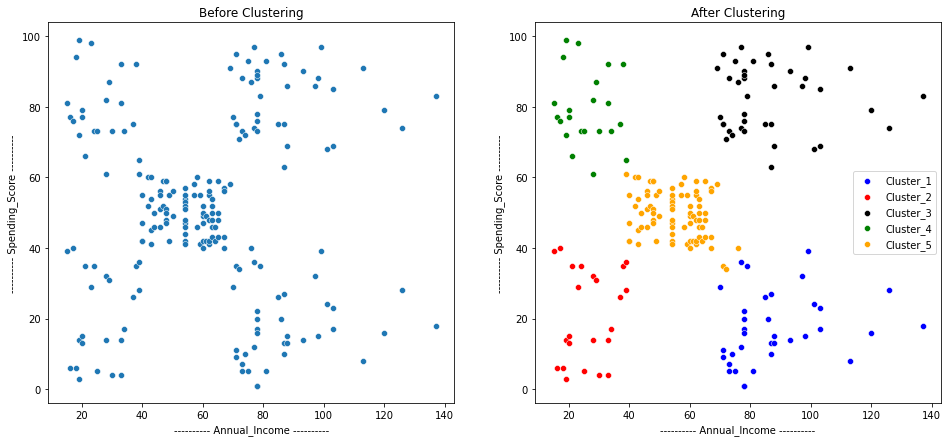

In [113]:
# combine all above 5 clusters into a scatter plot
plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
plt.title('Before Clustering')
sns.scatterplot(data['Annual_Income_(k$)'],data['Spending_Score'])
plt.ylabel('---------- Spending_Score ----------')
plt.xlabel('---------- Annual_Income ----------')
plt.subplot(1,2,2) 
############################################################
plt.title('After Clustering')
sns.scatterplot(x[y_means == 0,0],x[y_means == 0,1],color='blue', label = 'Cluster_1')
sns.scatterplot(x[y_means == 1,0],x[y_means == 1,1],color='red', label = 'Cluster_2')
sns.scatterplot(x[y_means == 2,0],x[y_means == 2,1],color='black', label = 'Cluster_3')
sns.scatterplot(x[y_means == 3,0],x[y_means == 3,1],color='green', label = 'Cluster_4')
sns.scatterplot(x[y_means == 4,0],x[y_means == 4,1],color='orange', label = 'Cluster_5')
plt.ylabel('---------- Spending_Score ----------')
plt.xlabel('---------- Annual_Income ----------')
plt.show()

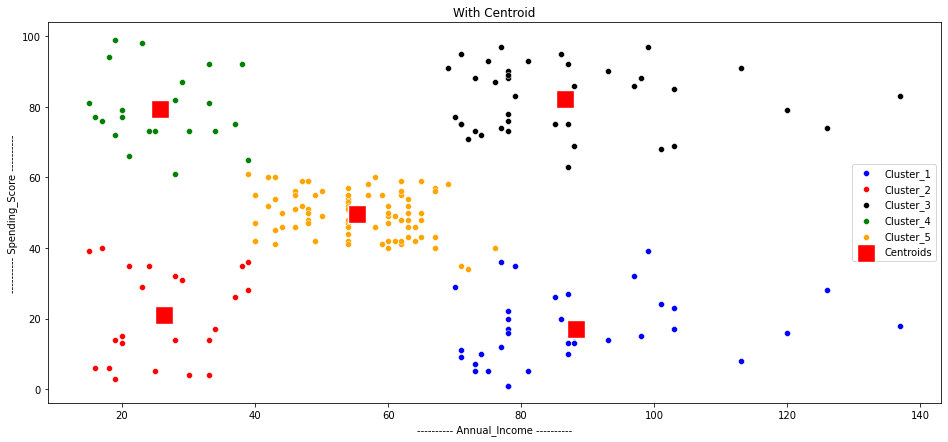

In [118]:
plt.figure(figsize=(16,7))
plt.title('With Centroid')
sns.scatterplot(x[y_means == 0,0],x[y_means == 0,1],color='blue', label = 'Cluster_1')
sns.scatterplot(x[y_means == 1,0],x[y_means == 1,1],color='red', label = 'Cluster_2')
sns.scatterplot(x[y_means == 2,0],x[y_means == 2,1],color='black', label = 'Cluster_3')
sns.scatterplot(x[y_means == 3,0],x[y_means == 3,1],color='green', label = 'Cluster_4')
sns.scatterplot(x[y_means == 4,0],x[y_means == 4,1],color='orange', label = 'Cluster_5')
sns.scatterplot(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color = 'red',label = 'Centroids',s=300,marker=',')
plt.ylabel('---------- Spending_Score ----------')
plt.xlabel('---------- Annual_Income ----------')
plt.show()

# Test and predict the cluster

In [77]:
cluster_pred = km.predict([[48, 72]])[0] # (annual_income , spending_score)
display(HTML(f'It belongs to <b>Cluster</b>_<b>{cluster_pred+1}</b>'))